In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Définition du couple de paramètres $a$ et $b$ pour notre gaz de van der Waals.

**Note** : aucune grandeur n'est physique, et on ne s'embête pas trop avec les valeurs de différentes constantes. L'objectif de ce notebook est de servir une discussion qualitative du phénomène de la transition de phase.

In [2]:
ab = (1e-4, 1e-4)

Valeurs de références de $T$, $p$ et $N$ :

In [3]:
TpN = (0.288, 350, 1)

In [4]:
def triple(TpN, ab):
    """point triple de l'eau"""
    a, b = ab
    N = TpN[2]
    return {'Tc':8*a/(27*b), 'Vc':3*b*N, 'pc':a/(27*b*b)}

In [5]:
triple(TpN, ab)

{'Tc': 0.2962962962962963,
 'Vc': 0.00030000000000000003,
 'pc': 370.3703703703704}

In [6]:
def p_func(V, T, N, ab):
    """p(T, V, N) pour un gaz de van der Waals"""
    a, b = ab
    return N*T/(V-b*N) - a*(N/V)**2

In [7]:
V = np.linspace(0.0002, 0.0005, 100) # un span pour les volumes... définis autour du volume criqique

Text(0.5, 1.0, '$p(V)$ pour un gaz de van der Waals à $T < T_c$')

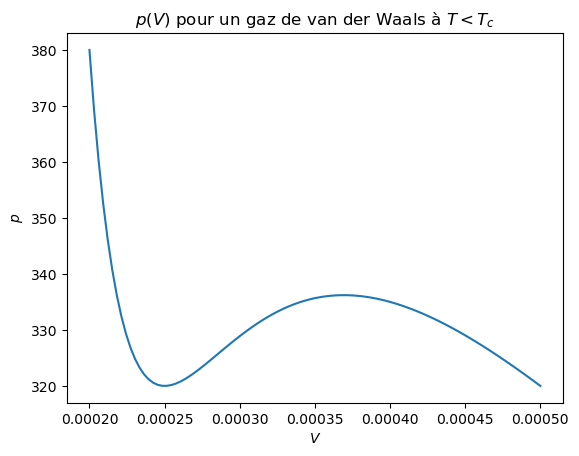

In [8]:
T, _, N = TpN
plt.plot(V, p_func(V, T, N, ab))
plt.xlabel('$V$')
plt.ylabel('$p$')
plt.title('$p(V)$ pour un gaz de van der Waals à $T < T_c$')

In [9]:
def p_prime(V, T, N, ab):
    """derivee de p(V) pour un gaz de van der Waals"""
    a, b = ab
    return - N*T/(V-b*N)**2 + 2*a*N**2/V**3

(-2.0, 2.0)

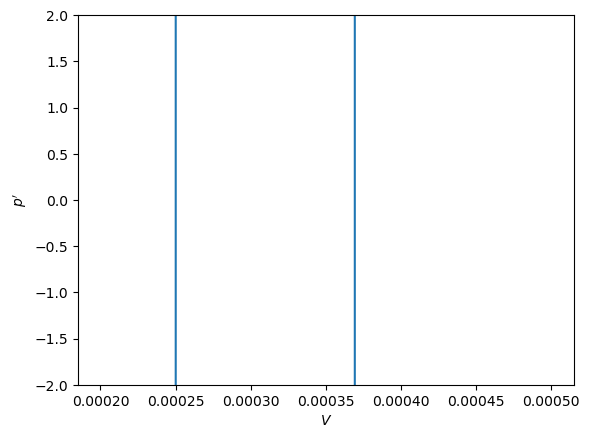

In [10]:
# Ce plot permet d'identifier les 2 valeur approchées pour lesquelles p'(V) = 0
plt.plot(V, p_prime(V, T, N, ab))
plt.xlabel('$V$')
plt.ylabel('$p^{\\prime}$')
plt.ylim([-2, 2])

In [11]:
T, p, N = TpN
V0=fsolve(p_prime, 0.0002, args=(T, N, ab))
print(V0, p_func(V0, T, N, ab))
V0=fsolve(p_prime, 0.0004, args=(T, N, ab))
print(V0, p_func(V0, T, N, ab))

[0.00025] [320.]
[0.00036921] [336.20734196]


In [12]:
def deBroglie(TpN, m=1):
    """longueur d'onde thermique"""
    T, p, N = TpN
    return 1/np.sqrt(2*np.pi*m*T)

In [13]:
def F(TpN, V, ab=ab):
    """energie libre pour un gaz de van der Waals"""
    T, _, N = TpN
    a, b = ab
    beta = 1/T
    Lambda = deBroglie(TpN)
    return N*T*(np.log(N/(V-b*N))+3*np.log(Lambda)-1-beta*a*(N/V))

In [14]:
def Phi(TpN, V):
    T, p, N = TpN
    return F(TpN, V)+p*V

In [15]:
T, p, N = TpN

Text(0, 0.5, '$F(T, V, N)+pV$')

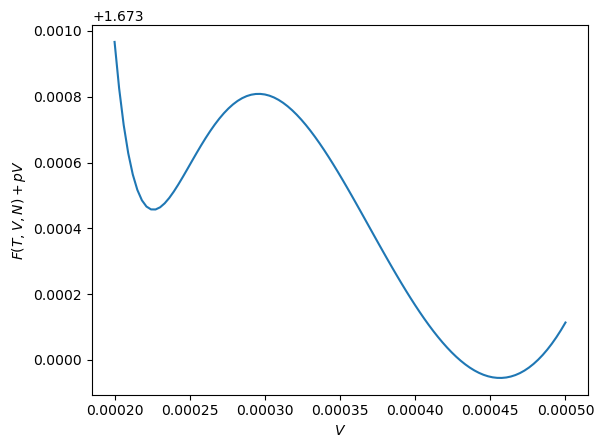

In [16]:
T, _, N = TpN
p = 328
TpN = [T, p, N]
plt.plot(V, Phi(TpN, V))
plt.xlabel('$V$')
plt.ylabel('$F(T, V, N)+pV$')

Ce premier plot est à basse pression, juste au dessus de la pression pour laquelle $p^{\prime}(V) = 0$. Le puit le plus profond est le second, à grand volume $V$. L'état le plus stable est donc celui à grand volume $V$ (associé au deuxième puit), pour lequel le système est alors gazeux. Mais si la pression n'est pas trop faible, il est aussi possible d'y observer la phase liquide qui est alors métastable.

Text(0, 0.5, '$F(T, V, N)+pV$')

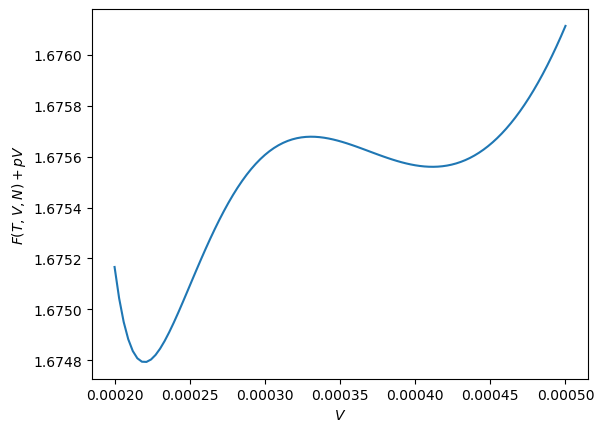

In [17]:
T, _, N = TpN
p = 334
TpN = [T, p, N]
plt.plot(V, Phi(TpN, V))
plt.xlabel('$V$')
plt.ylabel('$F(T, V, N)+pV$')

Ce second plot est à plus haute pression, juste en dessous de la pression pour laquelle $p^{\prime}(V) = 0$. Le puit le plus profond est le premier, à faible volume $V$. L'état le plus stable est donc celui à faible volume $V$ (associé au premier puit), pour lequel le système est alors liquide. Mais si la pression n'est pas trop grande, il est aussi possible d'y observer la phase gazeuse qui est alors métastable.

Text(0, 0.5, '$F(T, V, N)+pV$')

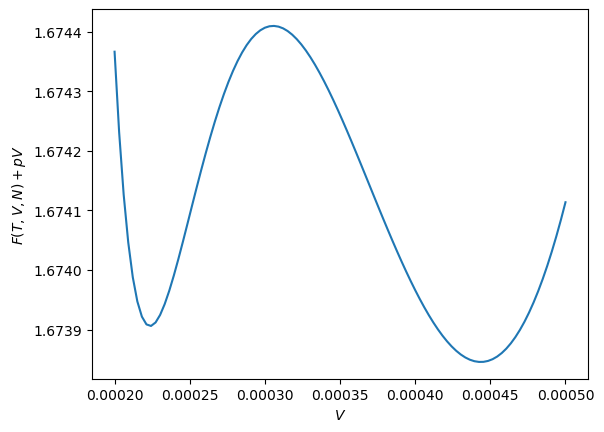

In [18]:
T, _, N = TpN
p = 330
TpN = [T, p, N]
plt.plot(V, Phi(TpN, V))
plt.xlabel('$V$')
plt.ylabel('$F(T, V, N)+pV$')

Que dire de la profondeuir de ces 2 puits ?